In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.table as tbl

In [2]:
constraints_file = 'ParameterInferenceFlux_noMCMC/A_Constraints.txt' # File containing A_Constraints
gal_z_dir_0 = 'GalZDist' # Directory containing 2MPZ_WIxSC galaxy redshift distributions
gal_z_dir_6 = 'GalZDist_2' # Directory containing DELS galaxy redshift distributions
gal_z_dir_10 = 'GalZDist_2' # Directory containing QSO galaxy redshift distributions

nzbins = 12 # Number of redshift bins

n_dens_rate_conv = 1.20e+50 # Conversion from A to number density rate
lum_dens_conv = 1.072e-7 # Conversion from A to luminosity density

crit_density = 1.36e+11 # Critical density in solar masses per cubic megaparsec

In [3]:
# Finds A constraints from text file
A_constraints = tbl.Table.read(constraints_file, format='ascii')

In [4]:
# Separates constraints into number/energy and with/without l=2 data point
E_nol2 = A_constraints[np.logical_and(A_constraints['col1']=='energy', A_constraints['col2']=='True')]
E_l2 = A_constraints[np.logical_and(A_constraints['col1']=='energy', A_constraints['col2']=='False')]
n_nol2 = A_constraints[np.logical_and(A_constraints['col1']=='number', A_constraints['col2']=='True')]
n_l2 = A_constraints[np.logical_and(A_constraints['col1']=='number', A_constraints['col2']=='False')]

In [5]:
# Loads in galaxy redshift distributions into astropy tables
gal_z_filenames = sorted(os.listdir(gal_z_dir_0))

gal_z_dist = []
for i in gal_z_filenames:
    gal_z_dist.append(tbl.Table.read(gal_z_dir_0 + '/' + i, format='ascii'))
for i in range(4):
    gal_z_dist.append(tbl.Table.read(gal_z_dir_6 + f'/dndz_DELS__{i}_nuX.txt', format='ascii'))
for i in range(2):
    gal_z_dist.append(tbl.Table.read(gal_z_dir_10 + f'/dndz_SDSS__QSO{i}_nuX.txt', format='ascii'))

In [6]:
# Calculates mean of each redshift bin
z_means = []
for i in range(nzbins):
    dndz_sum = np.sum(gal_z_dist[i]['col2'])
    weighted_mean_sum = np.sum(gal_z_dist[i]['col1']*gal_z_dist[i]['col2'])
    z_mean = weighted_mean_sum / (dndz_sum)
    z_means.append(z_mean)
print(z_means)

[0.06407827174103713, 0.13496441629178188, 0.18685257445722717, 0.23646066603982824, 0.2863330691957276, 0.3401448808107251, 0.2102603812029574, 0.3840257476663201, 0.5180407396043294, 0.6596476688217555, 1.1875387921612153, 1.8240245928166252]


In [7]:
# Plot settings
convs = [n_dens_rate_conv, n_dens_rate_conv,
         lum_dens_conv, lum_dens_conv]
crit_dens_convs = [1, 1,
                   1/crit_density, 1/crit_density]
data = [n_l2, n_nol2,
             E_l2, E_nol2]
data_var = [r'$\dot{\bar{n}}_\nu$', r'$\dot{\bar{n}}_\nu$', 
             r'$\dot{\Omega}_\nu$', r'$\dot{\Omega}_\nu$']
units_var = [r'${\rm Mpc}^{-3}\,{\rm yr}^{-1}$', r'${\rm Mpc}^{-3}\,{\rm yr}^{-1}$',
             r'${\rm yr}^{-1}$', r'${\rm yr}^{-1}$']
l2_var = ['including', 'without',
          'including', 'without']

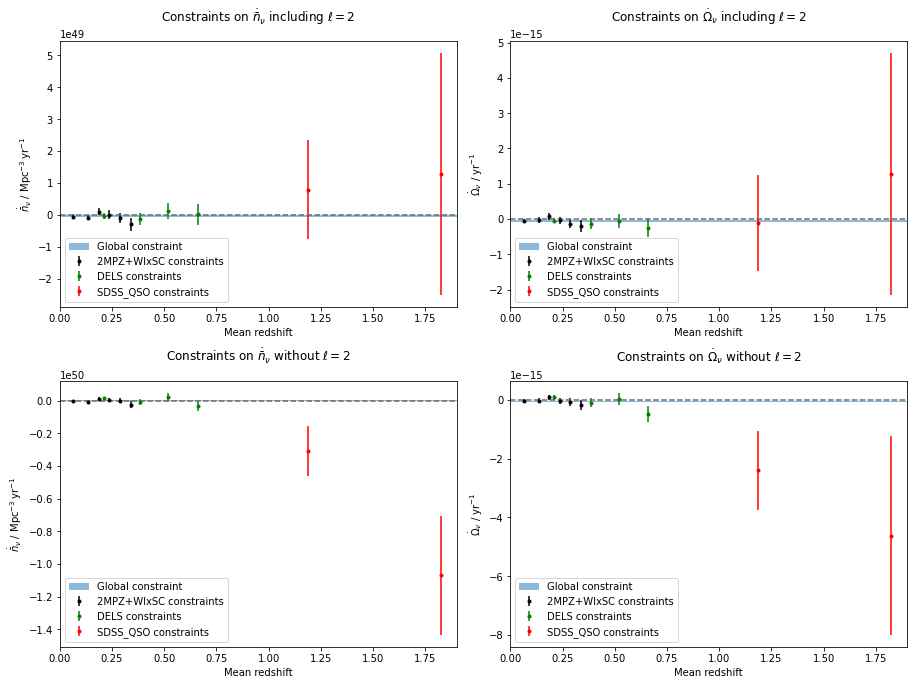

In [8]:
# Plots constraints on number density rate and luminosity density
fig, axs = plt.subplots(2, 2, figsize = (6.4*2, 4.8*2))
for i in range(len(data)):
    density_var = crit_dens_convs[i]*convs[i]*np.array([data[i]['col4'], data[i]['col5']]).T
    axs[i%2][int(i/2)].fill_between([0, 1.9], 
                     [density_var[0][0]+density_var[0][1]],
                     [density_var[0][0]-density_var[0][1]], 
                     alpha=0.5, label='Global constraint')
    axs[i%2][int(i/2)].errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
                 fmt='.', c='k', label='2MPZ+WIxSC constraints')
    axs[i%2][int(i/2)].errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
                 fmt='.', c='g', label='DELS constraints')
    axs[i%2][int(i/2)].errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
                 fmt='.', c='r', label='SDSS_QSO constraints')
    axs[i%2][int(i/2)].axhline(0, ls='--', c='dimgrey')
    axs[i%2][int(i/2)].set_xlabel('Mean redshift')
    axs[i%2][int(i/2)].set_ylabel(f'{data_var[i]} / {units_var[i]}')
    axs[i%2][int(i/2)].set_title(f'Constraints on {data_var[i]} {l2_var[i]} $\ell=2$', y=1.05)
    axs[i%2][int(i/2)].legend(loc='lower left')
    axs[i%2][int(i/2)].set_xlim(0, 1.9)
plt.tight_layout()
plt.savefig('NeutrinoConstraints.png')

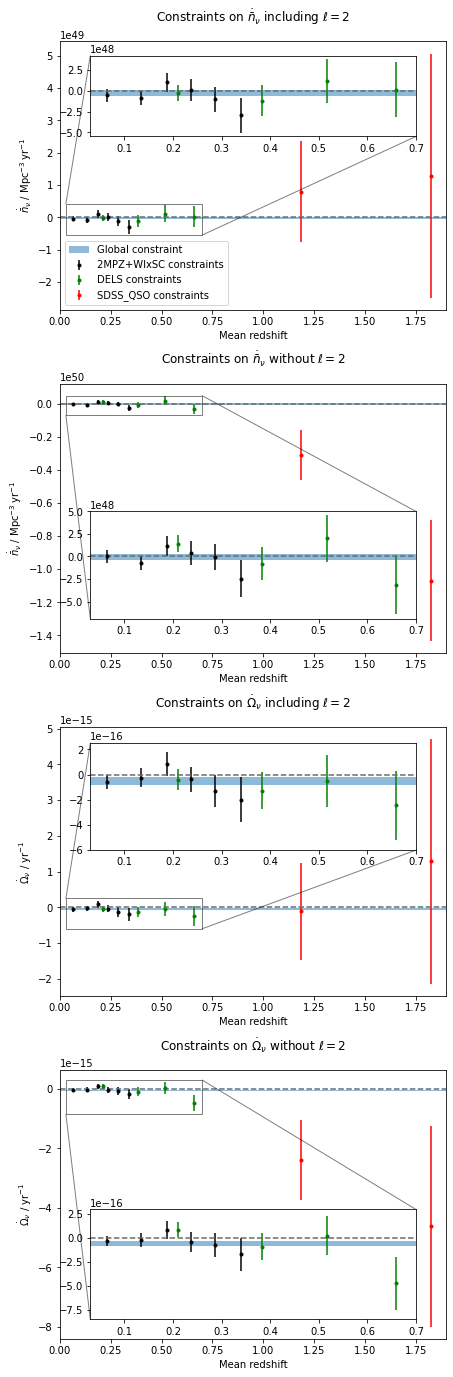

In [67]:
# Adds inset axes - VALUES HERE LIKELY MUST BE ADJUSTED IF DATA CHANGES

# Plots constraints on number density rate and luminosity density
fig, axs = plt.subplots(4, figsize = (6.4, 4.8*4))
for i in range(len(data)):
    density_var = crit_dens_convs[i]*convs[i]*np.array([data[i]['col4'], data[i]['col5']]).T
    axs[i].fill_between([0, 1.9], 
                     [density_var[0][0]+density_var[0][1]],
                     [density_var[0][0]-density_var[0][1]], 
                     alpha=0.5, label='Global constraint')
    axs[i].errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
                 fmt='.', c='k', label='2MPZ+WIxSC constraints')
    axs[i].errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
                 fmt='.', c='g', label='DELS constraints')
    axs[i].errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
                 fmt='.', c='r', label='SDSS_QSO constraints')
    axs[i].axhline(0, ls='--', c='dimgrey')
    axs[i].set_xlabel('Mean redshift')
    axs[i].set_ylabel(f'{data_var[i]} / {units_var[i]}')
    axs[i].set_title(f'Constraints on {data_var[i]} {l2_var[i]} $\ell=2$', y=1.05)
    axs[i].set_xlim(0, 1.9)
plt.tight_layout()

axins = np.empty(4, type(axs[0]))

# (Number, True) plot
density_var = crit_dens_convs[0]*convs[0]*np.array([data[0]['col4'], data[0]['col5']]).T
axins[0] = axs[0].inset_axes([0.15, 2.5e+49, 1.6, 2.5e+49], transform=axs[0].transData)
axins[0].fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
axins[0].errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
axins[0].errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
axins[0].errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
axins[0].axhline(0, ls='--', c='dimgrey')
x1, x2, y1, y2 = 0.03, 0.7, -0.55e+49, 0.42e+49
axins[0].set_xlim(x1, x2)
axins[0].set_ylim(y1, y2)
axs[0].legend(loc='lower left')
axs[0].indicate_inset_zoom(axins[0], edgecolor='black')

# (Number, False) plot
density_var = crit_dens_convs[1]*convs[1]*np.array([data[1]['col4'], data[1]['col5']]).T
axins[1] = axs[1].inset_axes([0.15, -1.3e+50, 1.6, 6.5e+49], transform=axs[1].transData)
axins[1].fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
axins[1].errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
axins[1].errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
axins[1].errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
axins[1].axhline(0, ls='--', c='dimgrey')
x1, x2, y1, y2 = 0.03, 0.7, -0.69e+49, 0.50e+49
axins[1].set_xlim(x1, x2)
axins[1].set_ylim(y1, y2)
axs[1].indicate_inset_zoom(axins[1], edgecolor='black')

# (Energy, True) plot
density_var = crit_dens_convs[2]*convs[2]*np.array([data[2]['col4'], data[2]['col5']]).T
axins[2] = axs[2].inset_axes([0.15, 1.6e-15, 1.6, 3e-15], transform=axs[2].transData)
axins[2].fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
axins[2].errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
axins[2].errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
axins[2].errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
axins[2].axhline(0, ls='--', c='dimgrey')
x1, x2, y1, y2 = 0.03, 0.7, -0.6e-15, 0.25e-15
axins[2].set_xlim(x1, x2)
axins[2].set_ylim(y1, y2)
axs[2].indicate_inset_zoom(axins[2], edgecolor='black')

# (Energy, False) plot
density_var = crit_dens_convs[3]*convs[3]*np.array([data[3]['col4'], data[3]['col5']]).T
axins[3] = axs[3].inset_axes([0.15, -7.75e-15, 1.6, 3.7e-15], transform=axs[3].transData)
axins[3].fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
axins[3].errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
axins[3].errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
axins[3].errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
axins[3].axhline(0, ls='--', c='dimgrey')
x1, x2, y1, y2 = 0.03, 0.7, -0.85e-15, 0.30e-15
axins[3].set_xlim(x1, x2)
axins[3].set_ylim(y1, y2)
axs[3].indicate_inset_zoom(axins[3], edgecolor='black')

# Saves figure
plt.savefig('NeutrinoInsetConstraints.pdf')

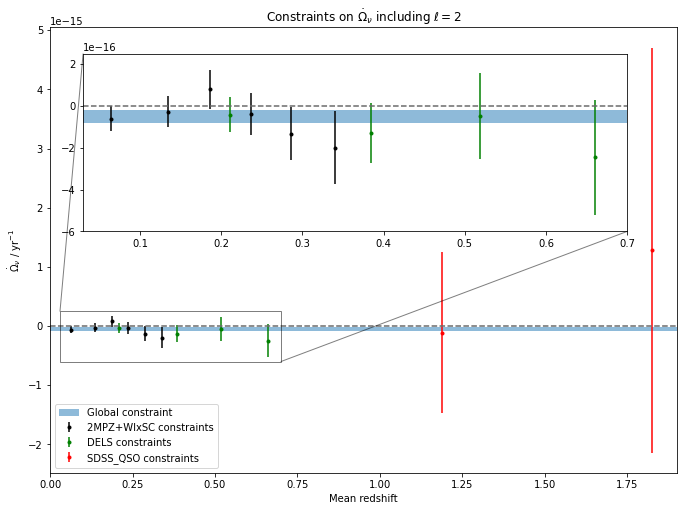

In [54]:
# Plot for presentation
fig, ax = plt.subplots(figsize=[6.4*1.5, 4.8*1.5])

density_var = crit_dens_convs[2]*convs[2]*np.array([data[2]['col4'], data[2]['col5']]).T
ax.fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
ax.errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
ax.errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
ax.errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
ax.axhline(0, ls='--', c='dimgrey')
ax.set_xlabel('Mean redshift')
ax.set_ylabel(f'{data_var[2]} / {units_var[2]}')
ax.set_title(f'Constraints on {data_var[2]} {l2_var[2]} $\ell=2$')
ax.legend(loc='lower left')
ax.set_xlim(0,1.9)

# Inset axes
axins = ax.inset_axes([0.1, 1.6e-15, 1.65, 3e-15], transform=ax.transData)
axins.fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
axins.errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
axins.errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
axins.errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
axins.axhline(0, ls='--', c='dimgrey')
x1, x2, y1, y2 = 0.03, 0.7, -0.6e-15, 0.25e-15
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor='black')
plt.tight_layout()
plt.savefig('SlidesConstraints.png')

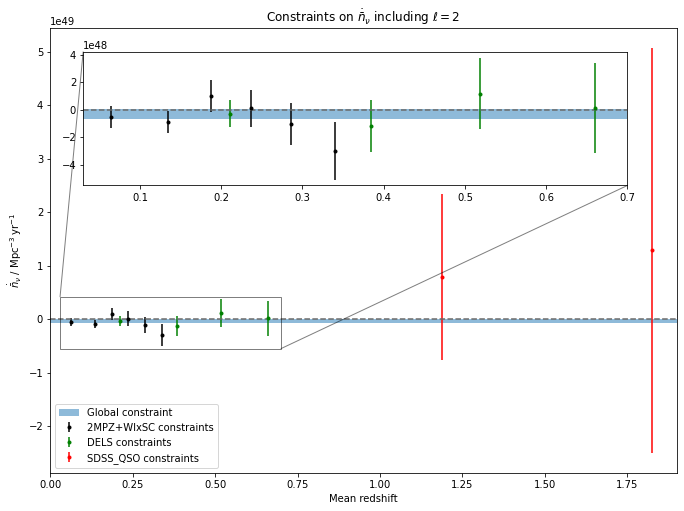

In [10]:
# Extra plot for presentation
fig, ax = plt.subplots(figsize=[6.4*1.5, 4.8*1.5])

density_var = crit_dens_convs[0]*convs[0]*np.array([data[0]['col4'], data[0]['col5']]).T
ax.fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
ax.errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
ax.errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
ax.errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
ax.axhline(0, ls='--', c='dimgrey')
ax.set_xlabel('Mean redshift')
ax.set_ylabel(f'{data_var[0]} / {units_var[0]}')
ax.set_title(f'Constraints on {data_var[0]} {l2_var[0]} $\ell=2$')
ax.legend(loc='lower left')
ax.set_xlim(0,1.9)

# Inset axes
axins = ax.inset_axes([0.1, 2.5e+49, 1.65, 2.5e+49], transform=ax.transData)
axins.fill_between([0, 1.9], 
                 [density_var[0][0]+density_var[0][1]],
                 [density_var[0][0]-density_var[0][1]], 
                 alpha=0.5, label='Global constraint')
axins.errorbar(z_means[0:6], density_var[1:7][:,0], yerr=[density_var[1:7][:,1]],
             fmt='.', c='k', label='2MPZ+WIxSC constraints')
axins.errorbar(z_means[6:10], density_var[7:11][:,0], yerr=[density_var[7:11][:,1]],
             fmt='.', c='g', label='DELS constraints')
axins.errorbar(z_means[10:], density_var[11:][:,0], yerr=[density_var[11:][:,1]],
             fmt='.', c='r', label='SDSS_QSO constraints')
axins.axhline(0, ls='--', c='dimgrey')
x1, x2, y1, y2 = 0.03, 0.7, -0.55e+49, 0.42e+49
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor='black')
plt.tight_layout()
plt.savefig('SlidesConstraintsExtra.png')